In [1]:
from modules.utils_data import load_data
from modules.plotting import plot_scatter_and_line
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import numpy as np

In [2]:
%%capture
# The previous line silences the output because I don't like it

# Load the data
df_combined = load_data()

In [3]:
df_combined

,SMILES,LogVP,LogP,LogOH,LogBCF,LogHalfLife,BP,Clint,FU,LogHL,LogKmHL,LogKOA,LogKOC,MP,LogMolar
0,B1Oc2ccccc2O1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
1,BrC(Br)(Br)Br,-0.568599,3.420,NaN,NaN,NaN,189.5,NaN,NaN,NaN,NaN,NaN,NaN,90.1,-3.140133
2,BrC(Br)(Br)c1ccc2ccccc2n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,NaN
3,BrC(Br)=C(Br)Br,NaN,NaN,NaN,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,56.5,NaN
4,BrC(Br)Br,0.732400,2.535,NaN,1.13,NaN,149.1,NaN,NaN,-3.271646,-0.7,NaN,2.06,8.0,-1.897436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23223,c1ncc2nc[nH]c2n1,NaN,-0.370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.5,0.619400
23224,c1ncncn1,NaN,0.120,-12.838632,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN
23225,c1nnn(C23CC4CC(CC(C4)C2)C3)n1,NaN,2.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23226,c1nnn[nH]1,NaN,-0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.0,NaN


In [4]:
#number of unique SMILES
df_combined['SMILES'].nunique()

23228

In [5]:
#counter number of nans for each column
df_combined.isna().sum()

SMILES             0
LogVP          20413
LogP            9281
LogOH          22536
LogBCF         22604
LogHalfLife    23078
BP             17795
Clint          22682
FU             21623
LogHL          22531
LogKmHL        22687
LogKOA         22958
LogKOC         22505
MP             14586
LogMolar       18012
dtype: int64

In [6]:
# Split the train/test data
train, test = train_test_split(df_combined, test_size=0.3, random_state=42)
for col in df_combined.columns[1:]:
    print(f'{col}: {test[col].count()/df_combined[col].count()}')

LogVP: 0.3108348134991119
LogP: 0.303577830357783
LogOH: 0.3352601156069364
LogBCF: 0.27884615384615385
LogHalfLife: 0.37333333333333335
BP: 0.3094054849990797
Clint: 0.2783882783882784
FU: 0.29283489096573206
LogHL: 0.3199426111908178
LogKmHL: 0.28835489833641403
LogKOA: 0.32222222222222224
LogKOC: 0.32088520055325037
MP: 0.30270770654940987
LogMolar: 0.29888803680981596


In [7]:
# Try different dataset sizes
sizes = [0.01,0.05, 0.1, 0.25, 0.5, 0.75, 1]
out_dir = 'LogP_different_sizes/'
os.makedirs(out_dir, exist_ok=True)

stl_test = test[["SMILES", "LogP"]].dropna()
stl_data = train[["SMILES", "LogP"]].dropna()


In [8]:
# # Try different dataset sizes
# sizes = [0.01,0.05, 0.1, 0.25, 0.5, 0.75, 1]
# out_dir = 'LogP_different_sizes/'
# os.makedirs(out_dir, exist_ok=True)

# stl_test = test[["SMILES", "LogP"]].dropna()
# stl_data = train[["SMILES", "LogP"]].dropna()

# for seed in range(3):
#     stl_data_shuffled = stl_data.sample(frac=1, random_state=seed)  # Shuffle data with different random seeds
#     other_properties = train.drop(columns="LogP")
#     for s in sizes:
#         os.makedirs(out_dir + f'seed_{seed}/{s}_STL', exist_ok=True)
#         stl_less_data = stl_data_shuffled[:int(len(stl_data_shuffled)*s)]
#         print("frac", s, ":", len(stl_less_data))   
#         stl_less_data.to_csv(out_dir + f'seed_{seed}/{s}_STL/train.csv', index=False)
#         stl_test.to_csv(out_dir + f'seed_{seed}/{s}_STL/test.csv', index=False)
#         os.makedirs(out_dir + f'seed_{seed}/{s}_MTL', exist_ok=True)
#         mtl_less_data = pd.merge(stl_less_data, other_properties, on="SMILES", how="outer")
#         mtl_less_data.to_csv(out_dir + f'seed_{seed}/{s}_MTL/train.csv', index=False)
#         test.to_csv(out_dir + f'seed_{seed}/{s}_MTL/test.csv', index=False)
#         properties = mtl_less_data.drop(columns='SMILES').columns.to_list()
#         # train STL
#         os.system(f'''chemprop train \
#         --data-path {out_dir}seed_{seed}/{s}_STL/train.csv \
#         --task-type regression \
#         --output-dir {out_dir}seed_{seed}/{s}_STL/model/ \
#         --num-workers 15 ''')

#         # Predict
#         os.system(f'''chemprop predict \
#         --test-path {out_dir}seed_{seed}/{s}_STL/test.csv \
#         --model-path {out_dir}seed_{seed}/{s}_STL/model/model_0/best.pt \
#         --preds-path {out_dir}seed_{seed}/{s}_STL/preds.csv \
#         --num-workers 15''')

#         # train MTL
#         os.system(f'''chemprop train \
#         --data-path {out_dir}seed_{seed}/{s}_MTL/train.csv \
#         --task-type regression \
#         --target-columns {" ".join(properties)} \
#         --task-weights {" ".join([str(1) if p != "LogP" else str(10) for p in properties])} \
#         --output-dir {out_dir}seed_{seed}/{s}_MTL/model/ \
#         --num-workers 15 ''')

#         # Predict
#         os.system(f'''chemprop predict \
#         --test-path {out_dir}seed_{seed}/{s}_MTL/test.csv \
#         --model-path {out_dir}seed_{seed}/{s}_MTL/model/model_0/best.pt \
#         --preds-path {out_dir}seed_{seed}/{s}_MTL/preds.csv \
#         --num-workers 15''')

/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarnin

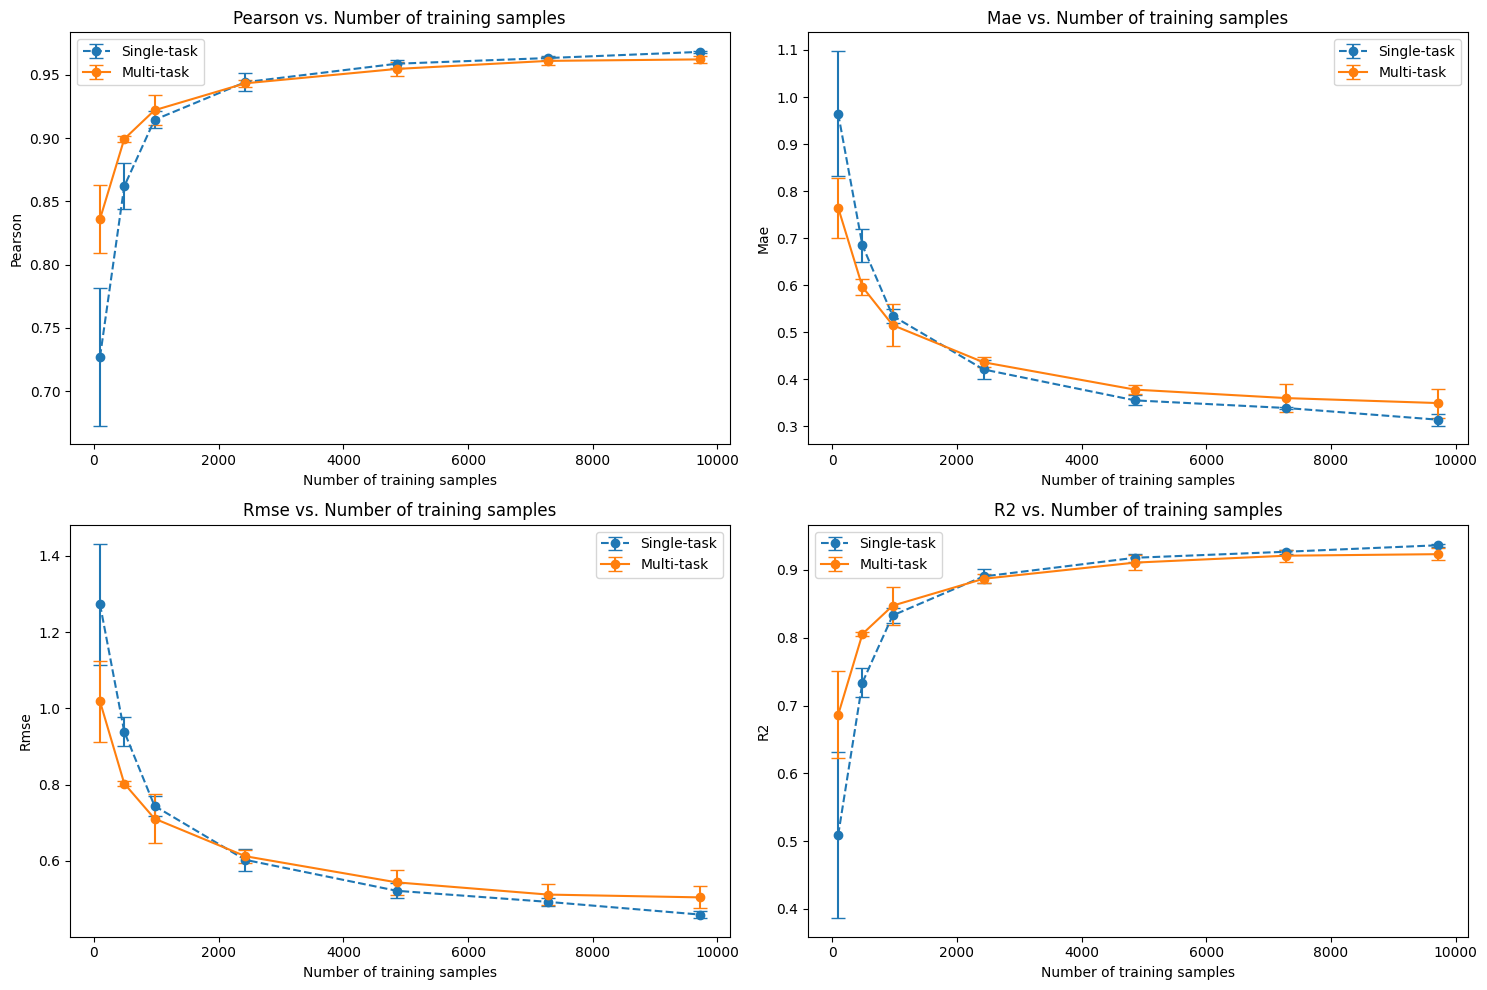

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, t
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the dataset sizes and output directory
sizes = [0.01,0.05, 0.1, 0.25, 0.5, 0.75, 1]
out_dir = 'LogP_different_sizes/'

# Function to calculate 90% confidence interval
def confidence_interval(data, confidence=0.90):
    n = len(data)
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)
    margin_of_error = sem * t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

# Initialize dictionary to store results
metrics = ["pearson", "mae", "rmse", "r2"]
results = {metric: {s: {"single_task": [], "multi_task": []} for s in sizes} for metric in metrics}

# Collect metrics for each dataset size and each seed
for seed in range(3):
    for s in sizes:
        # Prepare data for single-task
        single_task_df = pd.read_csv(out_dir + f'seed_{seed}/{s}_STL/preds_0.csv')
        valid_single = single_task_df[['SMILES', "LogP", 'pred_0']].dropna()
        true_single_values = valid_single["LogP"]
        pred_single_values = valid_single['pred_0']

        # Prepare data for multi-task
        multi_task_df = pd.read_csv(out_dir + f'seed_{seed}/{s}_MTL/preds_0.csv')
        valid_multi = multi_task_df[['SMILES', "LogP", 'pred_0']].dropna()
        true_multi_values = valid_multi["LogP"]
        pred_multi_values = valid_multi['pred_0']

        # Calculate metrics and store results
        results["pearson"][s]["single_task"].append(pearsonr(true_single_values, pred_single_values)[0])
        results["mae"][s]["single_task"].append(mean_absolute_error(true_single_values, pred_single_values))
        results["rmse"][s]["single_task"].append(mean_squared_error(true_single_values, pred_single_values, squared=False))
        results["r2"][s]["single_task"].append(r2_score(true_single_values, pred_single_values))

        results["pearson"][s]["multi_task"].append(pearsonr(true_multi_values, pred_multi_values)[0])
        results["mae"][s]["multi_task"].append(mean_absolute_error(true_multi_values, pred_multi_values))
        results["rmse"][s]["multi_task"].append(mean_squared_error(true_multi_values, pred_multi_values, squared=False))
        results["r2"][s]["multi_task"].append(r2_score(true_multi_values, pred_multi_values))

# Calculate mean and confidence intervals for each metric
aggregated_results = {metric: [] for metric in metrics}

for metric in metrics:
    for s in sizes:
        single_mean, single_lower, single_upper = confidence_interval(results[metric][s]["single_task"])
        multi_mean, multi_lower, multi_upper = confidence_interval(results[metric][s]["multi_task"])
        aggregated_results[metric].append([s, single_mean, single_lower, single_upper, multi_mean, multi_lower, multi_upper])

# Convert results to DataFrames
dfs = {metric: pd.DataFrame(aggregated_results[metric], columns=["Size", "Single-task mean", "Single-task lower CI", "Single-task upper CI",
                                                                 "Multi-task mean", "Multi-task lower CI", "Multi-task upper CI"]) for metric in metrics}

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, (metric, df) in zip(axs.flatten(), dfs.items()):
    ax.errorbar(df["Size"] * len(stl_data), df["Single-task mean"],
                yerr=[df["Single-task mean"] - df["Single-task lower CI"],
                      df["Single-task upper CI"] - df["Single-task mean"]],
                label="Single-task", fmt='o', capsize=5,ls='--')
    ax.errorbar(df["Size"] * len(stl_data), df["Multi-task mean"],
                yerr=[df["Multi-task mean"] - df["Multi-task lower CI"],
                      df["Multi-task upper CI"] - df["Multi-task mean"]],
                label="Multi-task", fmt='o', ls='-', capsize=5)
    ax.set_xlabel("Number of training samples")
    ax.set_ylabel(metric.capitalize().replace("_", " "))
    ax.legend()
    ax.set_title(f'{metric.capitalize().replace("_", " ")} vs. Number of training samples')

plt.tight_layout()
plt.show()



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, t
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


sizes = [0.005, 0.02, 0.03, 0.04, 0.06, 0.07, 0.08, 0.09]
out_dir = 'LogP_different_sizes/'
os.makedirs(out_dir, exist_ok=True)

stl_test = test[["SMILES", "LogP"]].dropna()
stl_data = train[["SMILES", "LogP"]].dropna()

for seed in range(3):
    stl_data_shuffled = stl_data.sample(frac=1, random_state=seed)  # Shuffle data with different random seeds
    other_properties = train.drop(columns="LogP")
    for s in sizes:
        #check if outfle exists, if so, skip
        if os.path.exists(out_dir + f'seed_{seed}/{s}_MTL/preds_0.csv'):
            print(f'seed_{seed}/{s}_STL/preds_0.csv exists, skipping')
            continue
        os.makedirs(out_dir + f'seed_{seed}/{s}_STL', exist_ok=True)
        stl_less_data = stl_data_shuffled[:int(len(stl_data_shuffled)*s)]
        print("frac", s, ":", len(stl_less_data))   
        stl_less_data.to_csv(out_dir + f'seed_{seed}/{s}_STL/train.csv', index=False)
        stl_test.to_csv(out_dir + f'seed_{seed}/{s}_STL/test.csv', index=False)
        os.makedirs(out_dir + f'seed_{seed}/{s}_MTL', exist_ok=True)
        mtl_less_data = pd.merge(stl_less_data, other_properties, on="SMILES", how="outer")
        mtl_less_data.to_csv(out_dir + f'seed_{seed}/{s}_MTL/train.csv', index=False)
        test.to_csv(out_dir + f'seed_{seed}/{s}_MTL/test.csv', index=False)
        properties = mtl_less_data.drop(columns='SMILES').columns.to_list()
        # train STL
        os.system(f'''chemprop train \
        --data-path {out_dir}seed_{seed}/{s}_STL/train.csv \
        --task-type regression \
        --output-dir {out_dir}seed_{seed}/{s}_STL/model/ \
        --num-workers 15 > /dev/null 2>&1''')
        
        # Predict
        os.system(f'''chemprop predict \
        --test-path {out_dir}seed_{seed}/{s}_STL/test.csv \
        --model-path {out_dir}seed_{seed}/{s}_STL/model/model_0/best.pt \
        --preds-path {out_dir}seed_{seed}/{s}_STL/preds.csv \
        --num-workers 15 > /dev/null 2>&1''')

        # train MTL
        os.system(f'''chemprop train \
        --data-path {out_dir}seed_{seed}/{s}_MTL/train.csv \
        --task-type regression \
        --target-columns {" ".join(properties)} \
        --task-weights {" ".join([str(1) if p != "LogP" else str(10) for p in properties])} \
        --output-dir {out_dir}seed_{seed}/{s}_MTL/model/ \
        --num-workers 15 > /dev/null 2>&1''')

        # Predict
        os.system(f'''chemprop predict \
        --test-path {out_dir}seed_{seed}/{s}_MTL/test.csv \
        --model-path {out_dir}seed_{seed}/{s}_MTL/model/model_0/best.pt \
        --preds-path {out_dir}seed_{seed}/{s}_MTL/preds.csv \
        --num-workers 15 > /dev/null 2>&1''')


seed_0/0.005_STL/preds_0.csv exists, skipping
frac 0.02 : 194
seed_0/0.03_STL/preds_0.csv exists, skipping
frac 0.04 : 388
frac 0.06 : 582


/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarnin

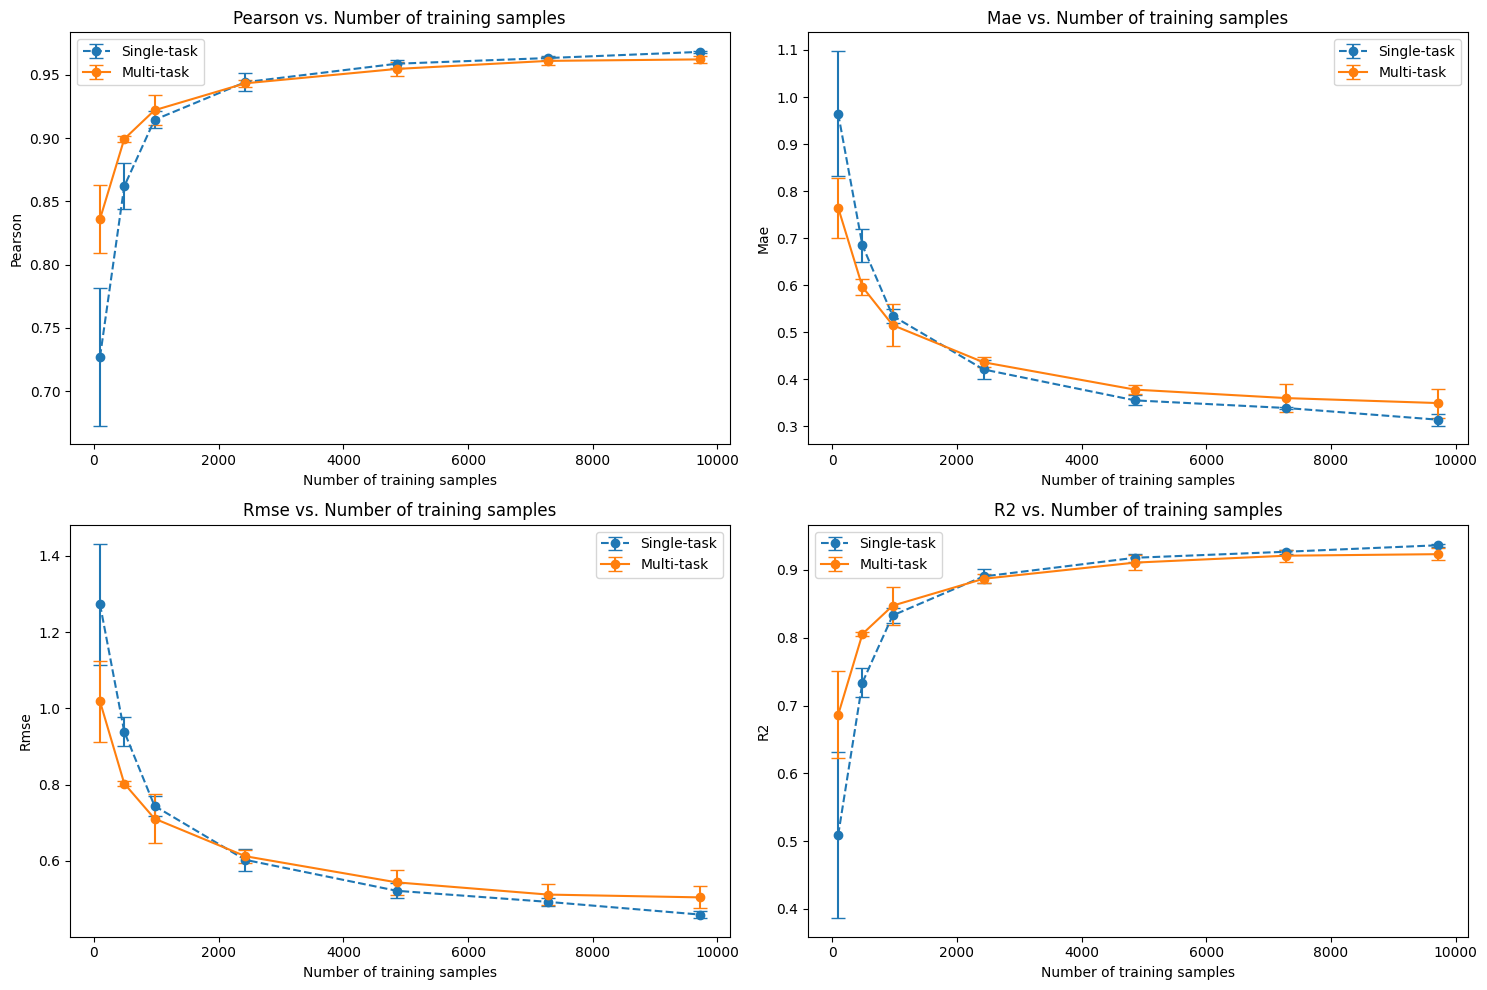

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, t
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the dataset sizes and output directory
sizes =[0.01,0.05,0.1, 0.25, 0.5, 0.75, 1]
out_dir = 'LogP_different_sizes/'

# Function to calculate 90% confidence interval
def confidence_interval(data, confidence=0.90):
    n = len(data)
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)
    margin_of_error = sem * t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

# Initialize dictionary to store results
metrics = ["pearson", "mae", "rmse", "r2"]
results = {metric: {s: {"single_task": [], "multi_task": []} for s in sizes} for metric in metrics}

# Collect metrics for each dataset size and each seed
for seed in range(3):
    for s in sizes:
        # Prepare data for single-task
        single_task_df = pd.read_csv(out_dir + f'seed_{seed}/{s}_STL/preds_0.csv')
        valid_single = single_task_df[['SMILES', "LogP", 'pred_0']].dropna()
        true_single_values = valid_single["LogP"]
        pred_single_values = valid_single['pred_0']

        # Prepare data for multi-task
        multi_task_df = pd.read_csv(out_dir + f'seed_{seed}/{s}_MTL/preds_0.csv')
        valid_multi = multi_task_df[['SMILES', "LogP", 'pred_0']].dropna()
        true_multi_values = valid_multi["LogP"]
        pred_multi_values = valid_multi['pred_0']

        # Calculate metrics and store results
        results["pearson"][s]["single_task"].append(pearsonr(true_single_values, pred_single_values)[0])
        results["mae"][s]["single_task"].append(mean_absolute_error(true_single_values, pred_single_values))
        results["rmse"][s]["single_task"].append(mean_squared_error(true_single_values, pred_single_values, squared=False))
        results["r2"][s]["single_task"].append(r2_score(true_single_values, pred_single_values))

        results["pearson"][s]["multi_task"].append(pearsonr(true_multi_values, pred_multi_values)[0])
        results["mae"][s]["multi_task"].append(mean_absolute_error(true_multi_values, pred_multi_values))
        results["rmse"][s]["multi_task"].append(mean_squared_error(true_multi_values, pred_multi_values, squared=False))
        results["r2"][s]["multi_task"].append(r2_score(true_multi_values, pred_multi_values))

# Calculate mean and confidence intervals for each metric
aggregated_results = {metric: [] for metric in metrics}

for metric in metrics:
    for s in sizes:
        single_mean, single_lower, single_upper = confidence_interval(results[metric][s]["single_task"])
        multi_mean, multi_lower, multi_upper = confidence_interval(results[metric][s]["multi_task"])
        aggregated_results[metric].append([s, single_mean, single_lower, single_upper, multi_mean, multi_lower, multi_upper])

# Convert results to DataFrames
dfs = {metric: pd.DataFrame(aggregated_results[metric], columns=["Size", "Single-task mean", "Single-task lower CI", "Single-task upper CI",
                                                                 "Multi-task mean", "Multi-task lower CI", "Multi-task upper CI"]) for metric in metrics}

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, (metric, df) in zip(axs.flatten(), dfs.items()):
    ax.errorbar(df["Size"] * len(stl_data), df["Single-task mean"],
                yerr=[df["Single-task mean"] - df["Single-task lower CI"],
                      df["Single-task upper CI"] - df["Single-task mean"]],
                label="Single-task", fmt='o', capsize=5,ls='--')
    ax.errorbar(df["Size"] * len(stl_data), df["Multi-task mean"],
                yerr=[df["Multi-task mean"] - df["Multi-task lower CI"],
                      df["Multi-task upper CI"] - df["Multi-task mean"]],
                label="Multi-task", fmt='o', ls='-', capsize=5)
    ax.set_xlabel("Number of training samples")
    ax.set_ylabel(metric.capitalize().replace("_", " "))
    ax.legend()
    ax.set_title(f'{metric.capitalize().replace("_", " ")} vs. Number of training samples')

plt.tight_layout()
plt.show()



/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarnin

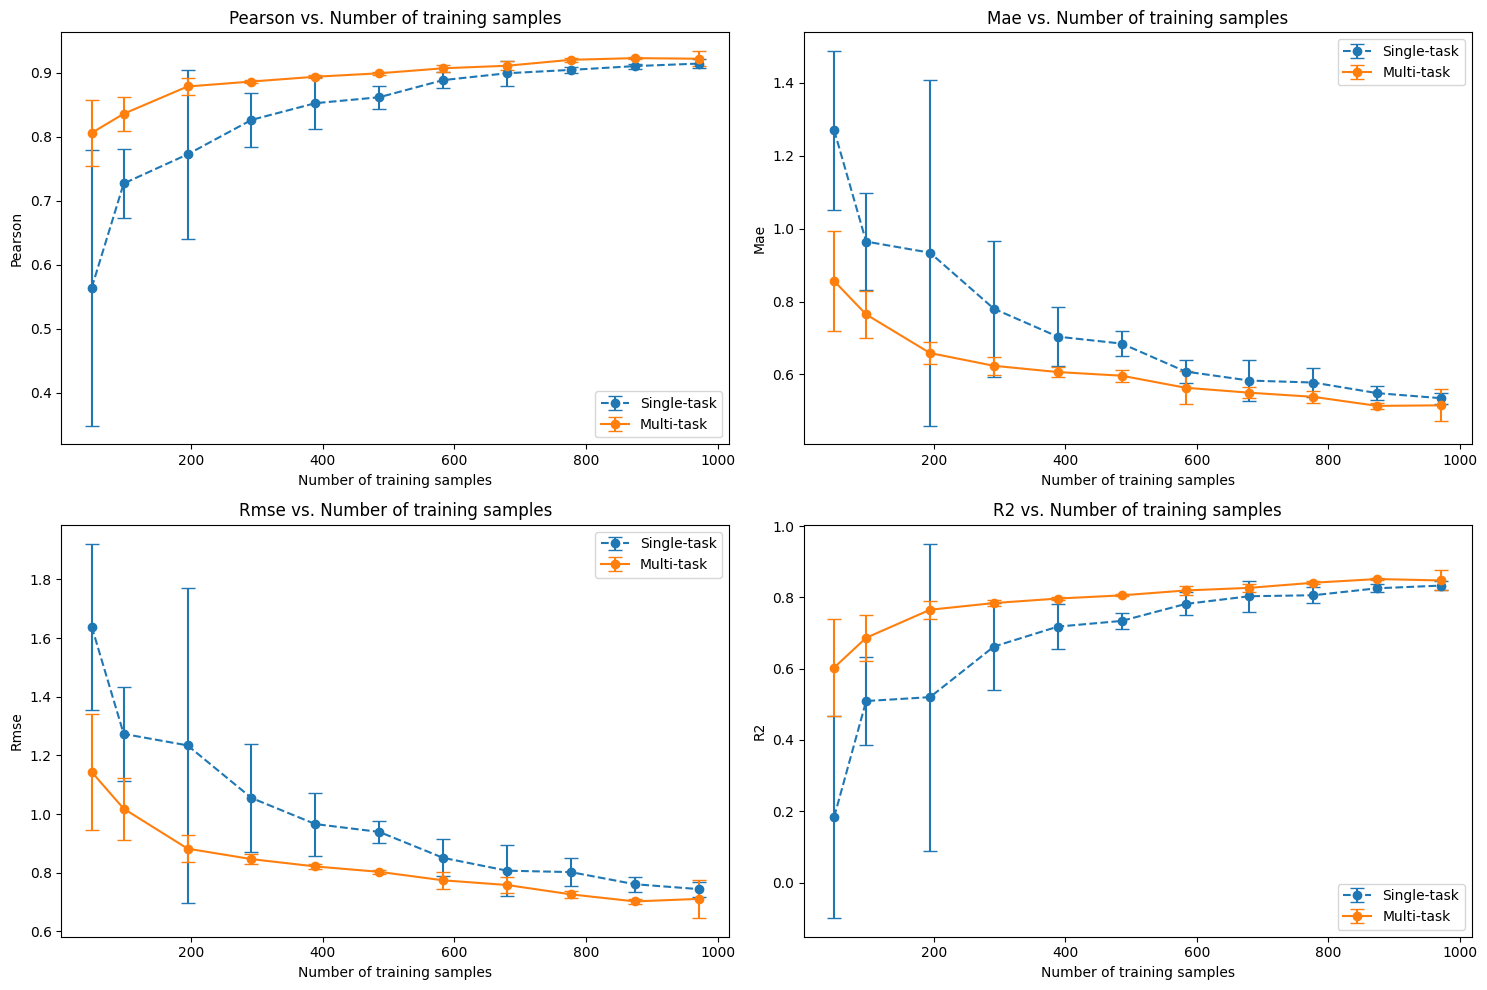

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, t
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the dataset sizes and output directory
sizes = [0.005, 0.01,0.02, 0.03, 0.04,0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

out_dir = 'LogP_different_sizes/'

# Function to calculate 90% confidence interval
def confidence_interval(data, confidence=0.90):
    n = len(data)
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)
    margin_of_error = sem * t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

# Initialize dictionary to store results
metrics = ["pearson", "mae", "rmse", "r2"]
results = {metric: {s: {"single_task": [], "multi_task": []} for s in sizes} for metric in metrics}

# Collect metrics for each dataset size and each seed
for seed in range(3):
    for s in sizes:
        # Prepare data for single-task
        single_task_df = pd.read_csv(out_dir + f'seed_{seed}/{s}_STL/preds_0.csv')
        valid_single = single_task_df[['SMILES', "LogP", 'pred_0']].dropna()
        true_single_values = valid_single["LogP"]
        pred_single_values = valid_single['pred_0']

        # Prepare data for multi-task
        multi_task_df = pd.read_csv(out_dir + f'seed_{seed}/{s}_MTL/preds_0.csv')
        valid_multi = multi_task_df[['SMILES', "LogP", 'pred_0']].dropna()
        true_multi_values = valid_multi["LogP"]
        pred_multi_values = valid_multi['pred_0']

        # Calculate metrics and store results
        results["pearson"][s]["single_task"].append(pearsonr(true_single_values, pred_single_values)[0])
        results["mae"][s]["single_task"].append(mean_absolute_error(true_single_values, pred_single_values))
        results["rmse"][s]["single_task"].append(mean_squared_error(true_single_values, pred_single_values, squared=False))
        results["r2"][s]["single_task"].append(r2_score(true_single_values, pred_single_values))

        results["pearson"][s]["multi_task"].append(pearsonr(true_multi_values, pred_multi_values)[0])
        results["mae"][s]["multi_task"].append(mean_absolute_error(true_multi_values, pred_multi_values))
        results["rmse"][s]["multi_task"].append(mean_squared_error(true_multi_values, pred_multi_values, squared=False))
        results["r2"][s]["multi_task"].append(r2_score(true_multi_values, pred_multi_values))

# Calculate mean and confidence intervals for each metric
aggregated_results = {metric: [] for metric in metrics}

for metric in metrics:
    for s in sizes:
        single_mean, single_lower, single_upper = confidence_interval(results[metric][s]["single_task"])
        multi_mean, multi_lower, multi_upper = confidence_interval(results[metric][s]["multi_task"])
        aggregated_results[metric].append([s, single_mean, single_lower, single_upper, multi_mean, multi_lower, multi_upper])

# Convert results to DataFrames
dfs = {metric: pd.DataFrame(aggregated_results[metric], columns=["Size", "Single-task mean", "Single-task lower CI", "Single-task upper CI",
                                                                 "Multi-task mean", "Multi-task lower CI", "Multi-task upper CI"]) for metric in metrics}

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, (metric, df) in zip(axs.flatten(), dfs.items()):
    ax.errorbar(df["Size"] * len(stl_data), df["Single-task mean"],
                yerr=[df["Single-task mean"] - df["Single-task lower CI"],
                      df["Single-task upper CI"] - df["Single-task mean"]],
                label="Single-task", fmt='o', capsize=5,ls='--')
    ax.errorbar(df["Size"] * len(stl_data), df["Multi-task mean"],
                yerr=[df["Multi-task mean"] - df["Multi-task lower CI"],
                      df["Multi-task upper CI"] - df["Multi-task mean"]],
                label="Multi-task", fmt='o', ls='-', capsize=5)
    ax.set_xlabel("Number of training samples")
    ax.set_ylabel(metric.capitalize().replace("_", " "))
    ax.legend()
    ax.set_title(f'{metric.capitalize().replace("_", " ")} vs. Number of training samples')

plt.tight_layout()
plt.show()



In [15]:
results

{'pearson': {0.005: {'single_task': [0.41806918046523955, 0.6534236981132437],
   'multi_task': [0.7751956089734738, 0.835612521101351]},
  0.02: {'single_task': [0.8186306532050968, 0.8174688685793184],
   'multi_task': [0.8749980955174497, 0.8874972241481144]},
  0.03: {'single_task': [0.8414451034085433, 0.8402041522897957],
   'multi_task': [0.8858527322149047, 0.8851396143544635]},
  0.05: {'single_task': [0.8689030260035409, 0.8494687857358799],
   'multi_task': [0.8993320802961993, 0.9005425652148269]},
  0.1: {'single_task': [0.9181103317608548, 0.9102443808554995],
   'multi_task': [0.9226705776910241, 0.9287964402305797]},
  0.25: {'single_task': [0.9411920602035394, 0.9488470733634353],
   'multi_task': [0.9421708822012674, 0.9450459263715681]},
  0.5: {'single_task': [0.9567552169149572, 0.9592065599453676],
   'multi_task': [0.9507720766555835, 0.957198228568717]},
  0.75: {'single_task': [0.9626473384031461, 0.962792050526045],
   'multi_task': [0.9594331813207535, 0.9628

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, t
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the dataset sizes and output directory
sizes = [0.005, 0.01,0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.25, 0.5, 0.75, 1]
out_dir = 'LogP_different_sizes/'

# Function to calculate 90% confidence interval
def confidence_interval(data, confidence=0.90):
    n = len(data)
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)
    margin_of_error = sem * t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

# Initialize dictionary to store results
metrics = ["pearson", "mae", "rmse", "r2"]
results = {metric: {s: {"single_task": [], "multi_task": []} for s in sizes} for metric in metrics}

# Collect metrics for each dataset size and each seed
for seed in range(3):
    for s in sizes:
        # Prepare data for single-task
        single_task_df = pd.read_csv(out_dir + f'seed_{seed}/{s}_STL/preds_0.csv')
        valid_single = single_task_df[['SMILES', "LogP", 'pred_0']].dropna()
        true_single_values = valid_single["LogP"]
        pred_single_values = valid_single['pred_0']

        # Prepare data for multi-task
        multi_task_df = pd.read_csv(out_dir + f'seed_{seed}/{s}_MTL/preds_0.csv')
        valid_multi = multi_task_df[['SMILES', "LogP", 'pred_0']].dropna()
        true_multi_values = valid_multi["LogP"]
        pred_multi_values = valid_multi['pred_0']

        # Calculate metrics and store results
        results["pearson"][s]["single_task"].append(pearsonr(true_single_values, pred_single_values)[0])
        results["mae"][s]["single_task"].append(mean_absolute_error(true_single_values, pred_single_values))
        results["rmse"][s]["single_task"].append(mean_squared_error(true_single_values, pred_single_values, squared=False))
        results["r2"][s]["single_task"].append(r2_score(true_single_values, pred_single_values))

        results["pearson"][s]["multi_task"].append(pearsonr(true_multi_values, pred_multi_values)[0])
        results["mae"][s]["multi_task"].append(mean_absolute_error(true_multi_values, pred_multi_values))
        results["rmse"][s]["multi_task"].append(mean_squared_error(true_multi_values, pred_multi_values, squared=False))
        results["r2"][s]["multi_task"].append(r2_score(true_multi_values, pred_multi_values))

# Calculate mean and confidence intervals for each metric
aggregated_results = {metric: [] for metric in metrics}

for metric in metrics:
    for s in sizes:
        single_mean, single_lower, single_upper = confidence_interval(results[metric][s]["single_task"])
        multi_mean, multi_lower, multi_upper = confidence_interval(results[metric][s]["multi_task"])
        aggregated_results[metric].append([s, single_mean, single_lower, single_upper, multi_mean, multi_lower, multi_upper])

# Convert results to DataFrames
dfs = {metric: pd.DataFrame(aggregated_results[metric], columns=["Size", "Single-task mean", "Single-task lower CI", "Single-task upper CI",
                                                                 "Multi-task mean", "Multi-task lower CI", "Multi-task upper CI"]) for metric in metrics}

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, (metric, df) in zip(axs.flatten(), dfs.items()):
    ax.errorbar(df["Size"] * len(stl_data), df["Single-task mean"],
                yerr=[df["Single-task mean"] - df["Single-task lower CI"],
                      df["Single-task upper CI"] - df["Single-task mean"]],
                label="Single-task", fmt='o', capsize=5,ls='--')
    ax.errorbar(df["Size"] * len(stl_data), df["Multi-task mean"],
                yerr=[df["Multi-task mean"] - df["Multi-task lower CI"],
                      df["Multi-task upper CI"] - df["Multi-task mean"]],
                label="Multi-task", fmt='o', ls='-', capsize=5)
    ax.set_xlabel("Number of training samples")
    ax.set_ylabel(metric.capitalize().replace("_", " "))
    ax.legend()
    ax.set_title(f'{metric.capitalize().replace("_", " ")} vs. Number of training samples')

plt.tight_layout()
plt.show()



/tmp/ipykernel_4010337/1947855448.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x)}' for x in ax.get_xticks()], fontsize=ticklabelsize)
/tmp/ipykernel_4010337/1947855448.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{x:.2f}' for x in ax.get_yticks()], fontsize=ticklabelsize)


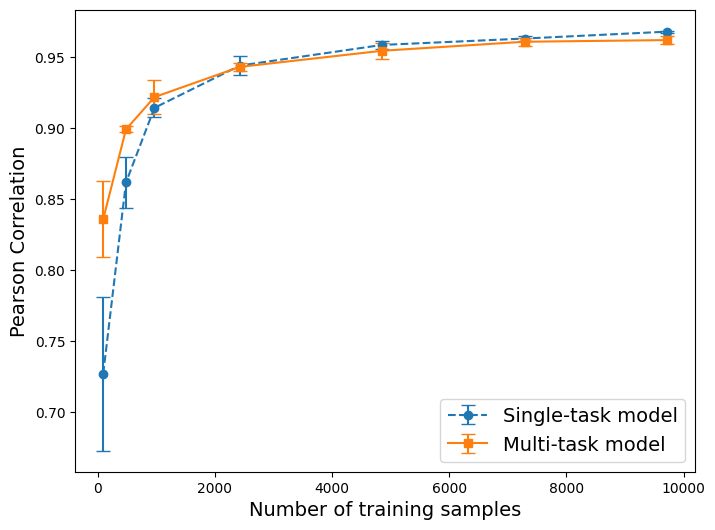

In [ ]:
# Plotting the Pearson correlation coefficient
fig, ax = plt.subplots(figsize=(8, 6))
ticklabelsize = 10
axislabelsize = 14
legend_fontize = 14
pearson_df = dfs["pearson"]
ax.errorbar(pearson_df["Size"] * len(stl_data), pearson_df["Single-task mean"],
            yerr=[pearson_df["Single-task mean"] - pearson_df["Single-task lower CI"],
                  pearson_df["Single-task upper CI"] - pearson_df["Single-task mean"]],
            label="Single-task model", fmt='o', capsize=5, ls='--')
ax.errorbar(pearson_df["Size"] * len(stl_data), pearson_df["Multi-task mean"],
            yerr=[pearson_df["Multi-task mean"] - pearson_df["Multi-task lower CI"],
                  pearson_df["Multi-task upper CI"] - pearson_df["Multi-task mean"]],
            label="Multi-task model", fmt='s', ls='-', capsize=5)
#list all fmt options
ax.set_xlabel("Number of training samples", fontsize=axislabelsize)
ax.set_ylabel("Pearson Correlation", fontsize=axislabelsize)
ax.set_xticklabels([f'{int(x)}' for x in ax.get_xticks()], fontsize=ticklabelsize)
ax.set_yticklabels([f'{x:.2f}' for x in ax.get_yticks()], fontsize=ticklabelsize)
ax.legend(loc="lower right", fontsize=legend_fontize)
plt.show()


/tmp/ipykernel_4010337/2637932354.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/tmp/ipykernel_4010337/2637932354.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  ax.errorbar(
/tmp/ipykernel_4010337/2637932354.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x)}' for x in ax.get_xticks()], fontsize=ticklabelsize)
/tmp/ipykernel_4010337/2637932354.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{x:.2f}' for x in ax.get_yticks()], fontsize=ticklabelsize)


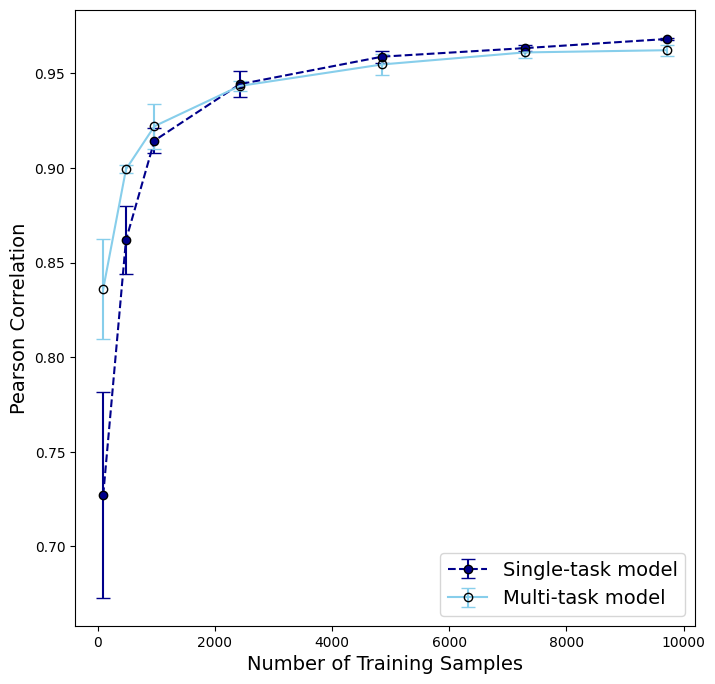

In [ ]:
import matplotlib.pyplot as plt

# Data preparation (assuming dfs and stl_data are predefined)
pearson_df = dfs["pearson"]

# Plot settings
fig, ax = plt.subplots(figsize=(8, 8))
ticklabelsize = 10
axislabelsize = 14
legend_fontsize = 14

# Plotting Single-task model
ax.errorbar(
    pearson_df["Size"] * len(stl_data),
    pearson_df["Single-task mean"],
    yerr=[
        pearson_df["Single-task mean"] - pearson_df["Single-task lower CI"],
        pearson_df["Single-task upper CI"] - pearson_df["Single-task mean"]
    ],
    label="Single-task model",
    fmt='o',  # circle marker
    capsize=5,  # size of the caps on error bars
    linestyle='--',  # dashed line
    color='darkblue',  # change color to reds
    marker='o',
    #change color of edge
    markeredgecolor = 'black'


)

# Plotting Multi-task model
ax.errorbar(
    pearson_df["Size"] * len(stl_data),
    pearson_df["Multi-task mean"],
    yerr=[
        pearson_df["Multi-task mean"] - pearson_df["Multi-task lower CI"],
        pearson_df["Multi-task upper CI"] - pearson_df["Multi-task mean"]
    ],
    label="Multi-task model",
    fmt='s',  # square marker
    capsize=5,  # size of the caps on error bars
    linestyle='-',  # solid line
    fillstyle='none',  # no fill for the marker\
    color='skyblue' , # change color to reds
    marker='o',
    markeredgecolor='black'
)

# Labeling axes
ax.set_xlabel("Number of Training Samples", fontsize=axislabelsize)
ax.set_ylabel("Pearson Correlation", fontsize=axislabelsize)

# Formatting tick labels
ax.set_xticklabels([f'{int(x)}' for x in ax.get_xticks()], fontsize=ticklabelsize)
ax.set_yticklabels([f'{x:.2f}' for x in ax.get_yticks()], fontsize=ticklabelsize)

# Adding legend
ax.legend(loc="lower right", fontsize=legend_fontsize)
#make square
# Showing the plot
# plt.show()
#save with dpi 800
#make square
fig.savefig("pearson_correlation.png", dpi=800)


/tmp/ipykernel_4010337/1539630274.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/tmp/ipykernel_4010337/1539630274.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s" (-> marker='s'). The keyword argument will take precedence.
  ax.errorbar(
/tmp/ipykernel_4010337/1539630274.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x)}' for x in ax.get_xticks()], fontsize=ticklabelsize)
/tmp/ipykernel_4010337/1539630274.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{x:.2f}' for x in ax.get_yticks()], fontsize=ticklabelsize)


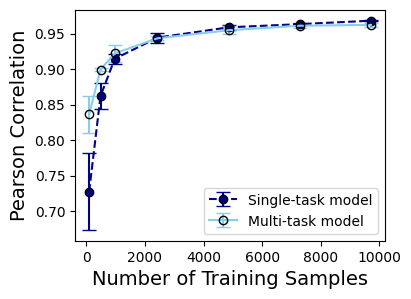

In [ ]:
import matplotlib.pyplot as plt

# Data preparation (assuming dfs and stl_data are predefined)
pearson_df = dfs["pearson"]

# Plot settings
fig, ax = plt.subplots(figsize=(4, 3))
ticklabelsize = 10
axislabelsize = 14
legend_fontsize = 14

# Plotting Single-task model
ax.errorbar(
    pearson_df["Size"] * len(stl_data),
    pearson_df["Single-task mean"],
    yerr=[
        pearson_df["Single-task mean"] - pearson_df["Single-task lower CI"],
        pearson_df["Single-task upper CI"] - pearson_df["Single-task mean"]
    ],
    label="Single-task model",
    fmt='o',  # circle marker
    capsize=5,  # size of the caps on error bars
    linestyle='--',  # dashed line
    color='darkblue',  # change color to reds
    marker='o',
    #change color of edge
    markeredgecolor = 'black'


)

# Plotting Multi-task model
ax.errorbar(
    pearson_df["Size"] * len(stl_data),
    pearson_df["Multi-task mean"],
    yerr=[
        pearson_df["Multi-task mean"] - pearson_df["Multi-task lower CI"],
        pearson_df["Multi-task upper CI"] - pearson_df["Multi-task mean"]
    ],
    label="Multi-task model",
    fmt='s',  # square marker
    capsize=5,  # size of the caps on error bars
    linestyle='-',  # solid line
    fillstyle='none',  # no fill for the marker\
    color='skyblue' , # change color to reds
    marker='o',
    markeredgecolor='black'
)

# Labeling axes
ax.set_xlabel("Number of Training Samples", fontsize=axislabelsize)
ax.set_ylabel("Pearson Correlation", fontsize=axislabelsize)

# Formatting tick labels
ax.set_xticklabels([f'{int(x)}' for x in ax.get_xticks()], fontsize=ticklabelsize)
ax.set_yticklabels([f'{x:.2f}' for x in ax.get_yticks()], fontsize=ticklabelsize)

# Adding legend
ax.legend(loc="lower right")

# Showing the plot
# plt.show()
#save with dpi 800
fig.savefig("pearson_correlation.png", dpi=800)


In [ ]:
pearson_df

,Size,Single-task mean,Single-task lower CI,Single-task upper CI,Multi-task mean,Multi-task lower CI,Multi-task upper CI
0,0.01,0.727148,0.672915,0.781381,0.836054,0.809509,0.862599
1,0.05,0.861886,0.843706,0.880067,0.899290,0.897143,0.901437
2,0.10,0.914449,0.907772,0.921127,0.922025,0.910027,0.934022
3,0.25,0.944219,0.937356,0.951082,0.943306,0.940726,0.945885
4,0.50,0.958774,0.955670,0.961879,0.954664,0.948896,0.960432
5,0.75,0.963275,0.961650,0.964900,0.961015,0.958067,0.963963
6,1.00,0.968108,0.967435,0.968781,0.962185,0.959368,0.965002


In [ ]:
# Just plot the R2
from sklearn.metrics import r2_score

r2 = []

for s in sizes:
    # Prepare data for single-task
    single_task_df = pd.read_csv(out_dir + f'{s}_STL/preds_0.csv')
    valid_single = single_task_df[['SMILES', "LogP", 'pred_0']].dropna()
    true_single_values = valid_single["LogP"]
    pred_single_values = valid_single['pred_0']

    # Prepare data for multi-task
    multi_task_df = pd.read_csv(out_dir + f'{s}_MTL/preds_0.csv')
    valid_multi = multi_task_df[['SMILES', "LogP", 'pred_0']].dropna()
    true_multi_values = valid_multi["LogP"]
    pred_multi_values = valid_multi['pred_0']

    r2.append([s, r2_score(true_single_values, pred_single_values), r2_score(true_multi_values, pred_multi_values)])

r2 = pd.DataFrame(r2, columns=["Size", "Single-task", "Multi-task"])
r2.set_index("Size", inplace=True)

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(r2.index*len(stl_data), r2["Single-task"], label="Single-task", marker='o')
plt.plot(r2.index*len(stl_data), r2["Multi-task"], label="Multi-task", marker='o', ls='--')

plt.xlabel("Number of training samples")
plt.ylabel("$R^2$")
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'LogP_different_sizes/0.01_STL/preds_0.csv'

: 